### Data Cleaning , Classification and Visualization

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#readind csv file
df = pd.read_csv('50_startups.csv.xls')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#to see the statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#check the dataset features datatypes
df.dtypes # can see that state is categorical data and other are continuous
# we need to encode the state to numbers since it is categorical data

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
df.isnull().sum() # to check if there are any missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

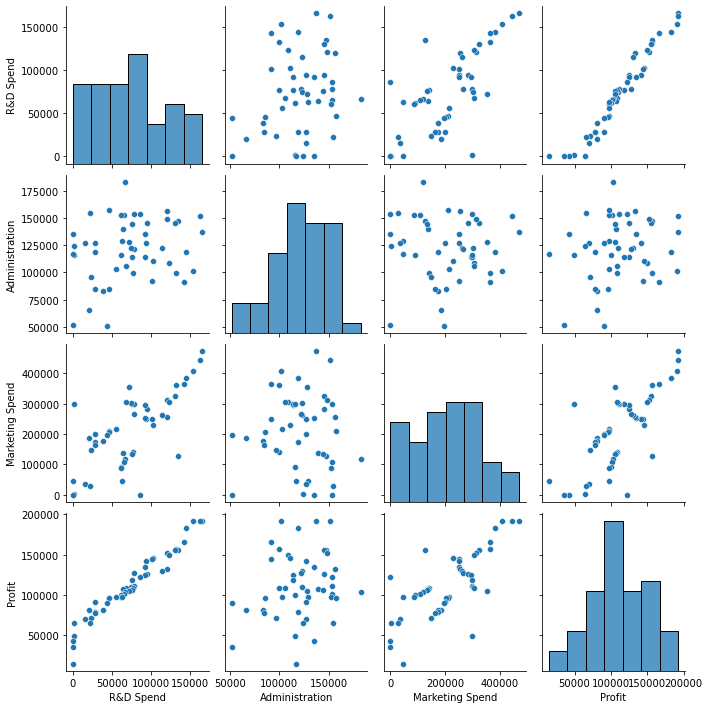

In [8]:
#do some ploting to see the distribution
sns.pairplot(df)



In [17]:
df['State'].value_counts()
#can see that there are 3 different categories for State variable


California    17
New York      17
Florida       16
Name: State, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

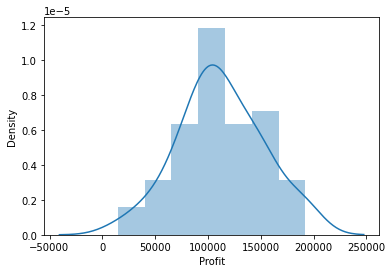

In [16]:
sns.distplot(df['Profit'])

In [15]:
startup_numeric = df.select_dtypes(include = ['float64','int64']) #data cleaning 
startup_numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [14]:
df.corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

In [20]:
startup_numeric.shape

(50, 4)

In [21]:
x = startup_numeric.iloc[:,0:13].values

In [22]:
y = df.iloc[:,-1].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [24]:
x.shape

(50, 4)

In [25]:
x_train.shape

(37, 4)

In [26]:
x_test.shape

(13, 4)

In [27]:
y_train.shape

(37,)

In [28]:
y_test.shape

(13,)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)    # (x_train,x_test,y_train,y_test)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54])

In [31]:
len(y_pred)

13

In [32]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54])

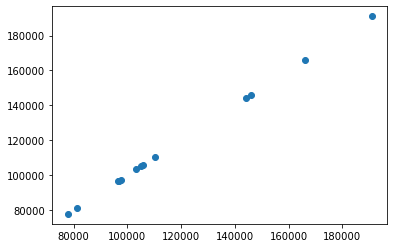

In [33]:
plt.scatter(y_pred,y_test)

In [34]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,103282.38,103282.38
1,144259.40,144259.40
2,146121.95,146121.95
3,77798.83,77798.83
4,191050.39,191050.39
5,105008.31,105008.31
6,81229.06,81229.06
7,97483.56,97483.56
8,110352.25,110352.25
9,166187.94,166187.94


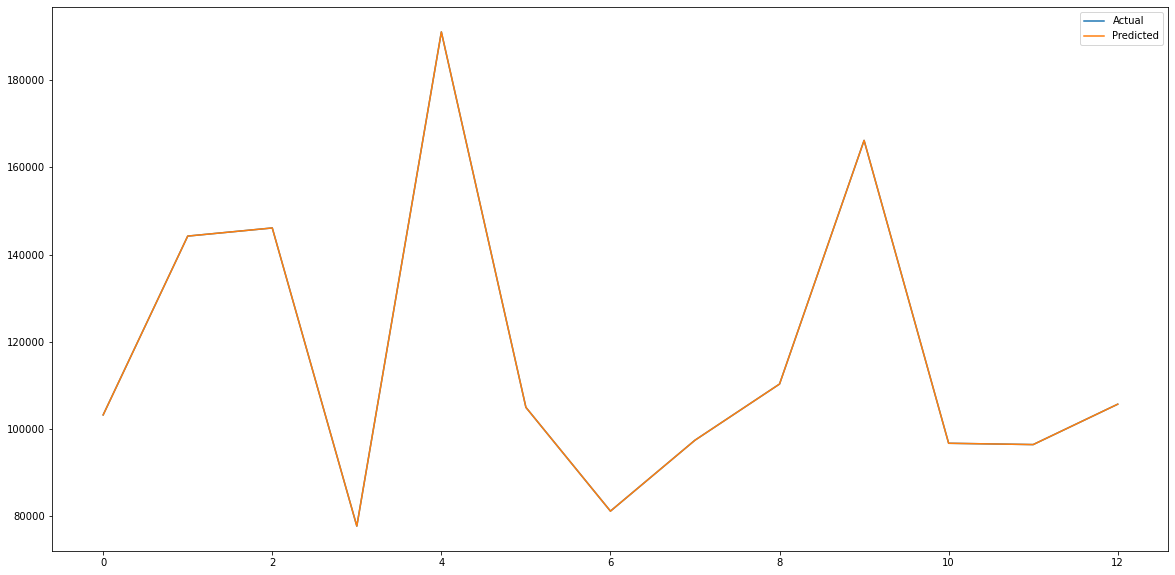

In [27]:
df1.plot(figsize=(20,10))
plt.show()

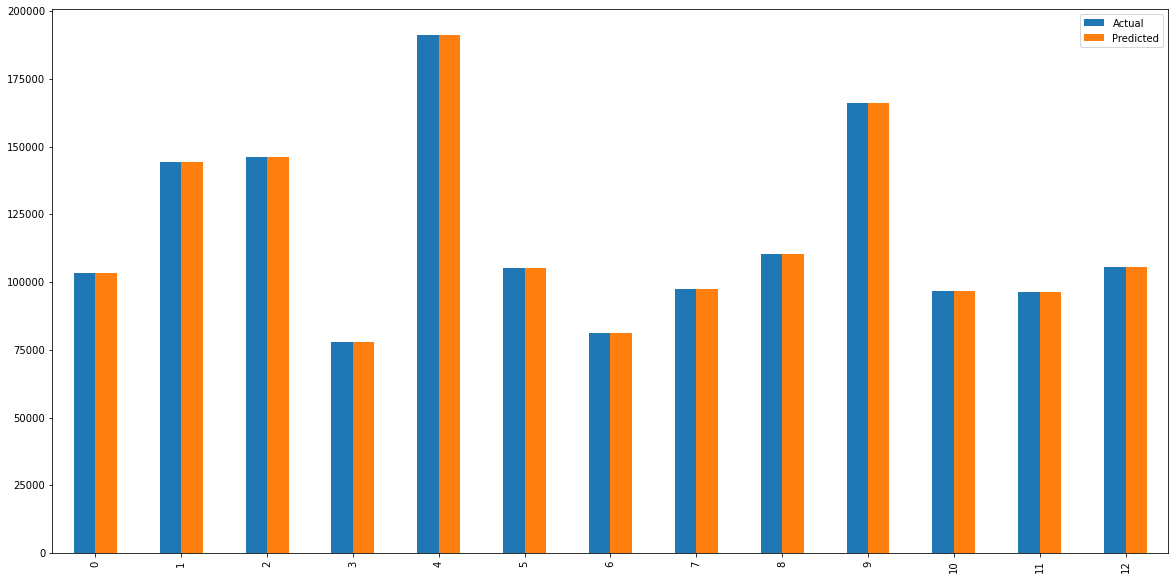

In [35]:
df1.plot(figsize=(20,10),kind='bar')
plt.show()

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

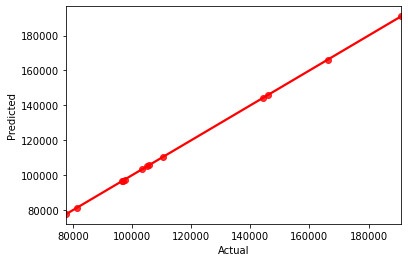

In [36]:
import seaborn as sns
sns.regplot(x='Actual',y='Predicted',data=df1,color='red')